## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#Performing EDA for a preliminary understanding of the data: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("C:\\Users\\joelm\\Desktop\\Flatiron School\\Phase 2\\Phase 2 Labs on GitHub\\dsc-phase-2-project-v2-3\\dsc-phase-2-project-v2-3\\data\\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [4]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Notes on columns: 'view' has five values - none, average, good, fair, excellent. 'grade' isn't the slope of the lot, but the quality of building materials - it includes poor, low, fair, low average, average, good, better, very good, excellent, luxury, and mansion.

Normally, I would proceed to my baseline model at this point. However, before I started my work on this notebook, I had wanted to consider some ideas to take the model past the baseline by adding further variables besides the obvious square footage one. 

Keeping my stakeholder and their clients in mind, what'd be an interesting correlation with real-world business applications? Well, when people look for a home, what do they often want? The saying "location, location, location" comes to mind. I'm not sure how to find and rate desireable locations, since that's pretty subjective and may differ from one buyer to the next, but maybe I could look into school district scores.

Looking at census data for King County, 55% of residents are either below 19 years of age or are between 25-44, which means they're at either at school age or at a time when they may be parents who are looking to buy a home in a good school district. In terms of sellers, residing in a good school district may be a reason to raise their sale price.

Below, "sds" represents a new file I created called "school_district_scores", which I made in Excel and will read in and merge with the main dataset below. I started this Excel spreadsheet with information from the King County Tax Assessor's office, where each school district in the county is listed: https://localscape.property/#kingcountyassessor/Education

From there, I went to each district's page on www.zipdatamaps.com and started making the Excel spreadsheet with the district name and the zip codes it encompasses. Next, I went to www.niche.com to gather school district "scores." Specifically, Niche gives districts "grade" scores from 1-12, which align with the following twelve possible scores: D-/D/D+/C-/C/C+/B-/B/B+/A-/A/A+.

While some zip codes only align with one school district, some are zoned for multiple districts. Rather than spend countless hours going through each of those multi-district zip code home records to ensure I specified it's exact district, I took the average district score for each district in that zip code. 

Now that I have a spreadsheet with zip codes and district scores, I converted it to a CSV file and merged it on the 'zipcode' column below:

In [5]:
sds = pd.read_csv("C:\\Users\\joelm\\Desktop\\Flatiron School\\Phase 2\\Phase 2 Labs on GitHub\\dsc-phase-2-project-v2-3\\dsc-phase-2-project-v2-3\\data\\kc_school_district_scores.csv")
sds

,zipcode,school_district_score
0,98001,8
1,98002,9
2,98003,7
3,98004,12
4,98005,12
...,...,...
88,98290,7
89,98296,10
90,98323,7
91,98354,7


In [6]:
#Making sure I didn't duplicate any zip codes:
sds['zipcode'].value_counts()

98047    1
98101    1
98168    1
98158    1
98092    1
        ..
98011    1
98012    1
98272    1
98014    1
98177    1
Name: zipcode, Length: 93, dtype: int64

In [7]:
#Joining the new CSV with X_train:
df = df.merge(sds, how='inner', on='zipcode')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,school_district_score
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,8
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,NO,NONE,...,880,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,8
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,AVERAGE,...,1620,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,8
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,NONE,...,1300,0.0,1961,NaN,98178,47.5053,-122.255,1320,7619,8
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,NO,NONE,...,860,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     21597 non-null  int64  
 1   date                   21597 non-null  object 
 2   price                  21597 non-null  float64
 3   bedrooms               21597 non-null  int64  
 4   bathrooms              21597 non-null  float64
 5   sqft_living            21597 non-null  int64  
 6   sqft_lot               21597 non-null  int64  
 7   floors                 21597 non-null  float64
 8   waterfront             19221 non-null  object 
 9   view                   21534 non-null  object 
 10  condition              21597 non-null  object 
 11  grade                  21597 non-null  object 
 12  sqft_above             21597 non-null  int64  
 13  sqft_basement          21597 non-null  object 
 14  yr_built               21597 non-null  int64  
 15  yr

Now that the school district scores are added into the provided DataFrame, let's perform a train-test-split before any variable transformations occur:

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)

In [10]:
y = df[['price']]
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,school_district_score
6405,5454000010,12/10/2014,3,1.75,2020,9478,1.0,NO,NONE,Good,...,2020,0.0,1961,0.0,98040,47.5383,-122.238,3050,15594,12
937,9265880170,8/26/2014,4,2.50,2470,5954,2.0,NaN,NONE,Average,...,2470,0.0,2013,0.0,98028,47.7685,-122.236,2470,4800,12
19076,4151800470,8/20/2014,3,2.00,1010,5973,1.0,NO,NONE,Very Good,...,1010,0.0,1942,0.0,98033,47.6652,-122.202,1920,6015,12
15201,9272201704,5/12/2014,2,2.50,980,895,2.0,NO,NONE,Average,...,670,310.0,2009,0.0,98116,47.5874,-122.386,980,899,10
13083,7151700190,3/31/2015,2,1.50,2210,5000,1.0,NO,AVERAGE,Average,...,1530,680.0,1951,0.0,98122,47.6122,-122.288,2700,5000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7459810210,10/2/2014,4,2.25,2050,26000,2.0,NO,NONE,Good,...,2050,0.0,1977,0.0,98042,47.3423,-122.063,2330,31100,9
21575,3835502815,9/25/2014,3,2.50,3110,9930,1.0,NO,FAIR,Average,...,1640,1470.0,1954,0.0,98039,47.6112,-122.226,3650,14399,12
5390,5693500760,7/7/2014,3,1.00,1890,3330,1.5,NO,NONE,Good,...,1390,500.0,1901,0.0,98103,47.6597,-122.352,1530,3330,10
860,3579000410,9/5/2014,3,2.25,2010,7447,2.0,NO,NONE,Average,...,2010,0.0,1985,0.0,98028,47.7470,-122.248,2230,7846,12


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16197 non-null  int64  
 1   date                   16197 non-null  object 
 2   bedrooms               16197 non-null  int64  
 3   bathrooms              16197 non-null  float64
 4   sqft_living            16197 non-null  int64  
 5   sqft_lot               16197 non-null  int64  
 6   floors                 16197 non-null  float64
 7   waterfront             14410 non-null  object 
 8   view                   16151 non-null  object 
 9   condition              16197 non-null  object 
 10  grade                  16197 non-null  object 
 11  sqft_above             16197 non-null  int64  
 12  sqft_basement          16197 non-null  object 
 13  yr_built               16197 non-null  int64  
 14  yr_renovated           13307 non-null  float64
 15 

In [13]:
y_train

,price
6405,740000.0
937,550000.0
19076,675000.0
15201,369000.0
13083,850000.0
...,...
11964,299000.0
21575,1260000.0
5390,570000.0
860,500000.0


In [14]:
X_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,school_district_score
3686,8024201370,12/8/2014,2,1.00,880,5111,1.0,NO,NONE,Average,...,880,0.0,1931,0.0,98115,47.6997,-122.314,1370,5111,10
10247,6073300040,1/6/2015,4,2.25,2020,12500,2.0,NO,NONE,Fair,...,2020,0.0,1966,0.0,98056,47.5403,-122.175,1800,13175,11
4037,431500155,10/24/2014,5,1.75,2020,6565,1.0,NO,NONE,Average,...,1120,900.0,1956,NaN,98115,47.6821,-122.283,2020,6552,10
3437,7237450110,7/1/2014,4,2.50,2530,5048,2.0,NO,NONE,Average,...,2530,0.0,2014,0.0,98038,47.3559,-122.063,2530,4359,10
19291,3982700250,4/23/2015,4,2.50,3030,7800,2.0,NO,NONE,Average,...,1580,1450.0,1991,0.0,98033,47.6890,-122.196,2840,7435,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,1672000170,9/8/2014,3,1.75,1890,11141,1.0,NO,NONE,Good,...,1890,0.0,1968,0.0,98006,47.5697,-122.163,2720,11144,11
15003,148000680,10/27/2014,3,1.75,1660,4800,1.0,NO,NONE,Average,...,960,700.0,1941,NaN,98116,47.5734,-122.412,1510,4800,10
13478,7133300380,2/9/2015,4,2.50,2500,4000,2.0,NO,NONE,Average,...,2500,0.0,2014,0.0,98144,47.5902,-122.311,1480,4300,10
18399,9346920260,6/4/2014,4,2.25,2500,8500,1.0,NaN,NONE,Good,...,1600,900.0,1978,0.0,98006,47.5615,-122.131,2290,8927,11


In [15]:
y_test

,price
3686,400000.0
10247,375000.0
4037,640000.0
3437,417838.0
19291,799900.0
...,...
18276,575000.0
15003,530000.0
13478,635000.0
18399,646000.0


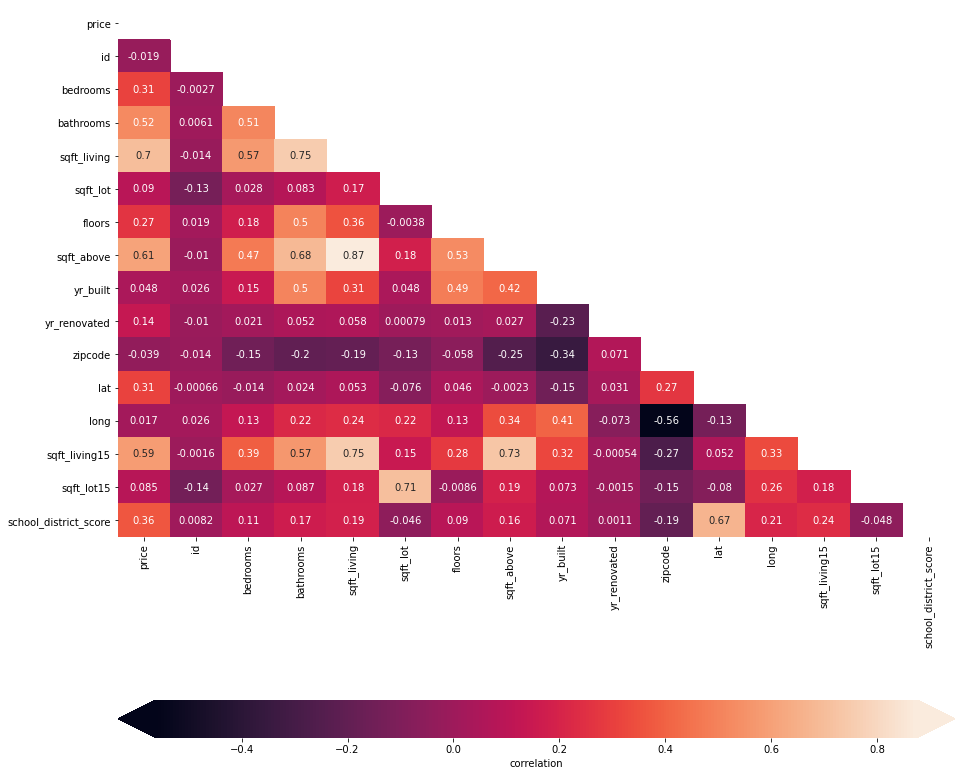

In [16]:
#Now let's combine X_train with y_train so we can see the correlation heatmap
# for all of our training data:
training_data = pd.concat([y_train, X_train], axis=1)
training_data

import seaborn as sns
heatmap_data = training_data
corr = heatmap_data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, mask=np.triu(corr), ax=ax, annot=True, 
            cbar_kws={'label':'correlation', 'orientation':'horizontal', 'pad':.2, 'extend':'both'});

It looks like 'sqft_living', aka the square footage of the living space in the home, is by far the most highly-correlated predictor for sale price. Let's take a closer look:

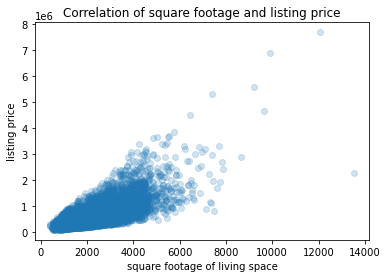

In [17]:
fig, ax = plt.subplots()
ax.scatter(X_train['sqft_living'], y_train, alpha=0.2)
ax.set_xlabel('square footage of living space')
ax.set_ylabel('listing price')
ax.set_title('Correlation of square footage and listing price');

There's definitely a strong positive correlation there, although it looks like the distribution of one or both isn't entirely normal. However, for purposes of our baseline model, this will serve as a good benchmark against which to compare future model iterations.

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'price ~ sqft_living'
model = ols(formula=formula, data=training_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.571e+04
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:08:14   Log-Likelihood:            -2.2463e+05
No. Observations:               16197   AIC:                         4.493e+05
Df Residuals:                   16195   BIC:                         4.493e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.311e+04   4980.254     -6.649      0.000   -4.29e+04   -2.34e+04
sqft_living   274.6815      2.192    125.331      0.000     270.386     278.977
==============================================================================
Omnibus:                    10707.172   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           374442.228
Skew:                           2.681   Prob(JB):                         0.00
Kurtosis:                      25.936   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
from sklearn.linear_model import LinearRegression
baseline_model = LinearRegression()

In [20]:
from sklearn.model_selection import cross_validate, ShuffleSplit

#X_train_sqft_cv = X_train['sqft_living'].reshape(-1,1)
most_correlated_feature = np.array(X_train['sqft_living']).reshape(-1,1)
y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=most_correlated_feature,
                y=y_train_cv,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.49237215871023315
test score: 0.4911998522614051


Unsurprisingly, we see a decent R-squared score. The condition number is quite high, although that isn't *too* big a concern when we're just working with one predictor. Nonetheless, as we iterate through more refined models, we'll want to lower that condition number. 

Looking at our intra-training-data cross-validation scores, the "test score" is comprable to the "train score" (even a little higher), so we're off to a good start with this baseline. 

Moving on towards building a more sophisticated model, our previous heatmap showed a 0.36 correlation between price and school district scores, the fourth-highest among all fifteen predictors. Let's look at the extent to which this pattern visually emerges:

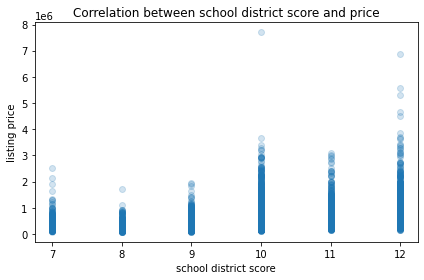

In [21]:
fig, ax = plt.subplots()
ax.scatter(X_train['school_district_score'], y_train, alpha=0.2)
ax.set_xlabel('school district score')
ax.set_ylabel('listing price')
ax.set_title('Correlation between school district score and price')
plt.tight_layout();

It looks like there's a general rise in the range of prices (both in terms of range-width and price) as the score of the school district increases. Let's construct our first model iteration here:

In [22]:
#Refit the model:
formula = 'price ~ school_district_score'
model = ols(formula=formula, data=training_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     2480.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:08:23   Log-Likelihood:            -2.2897e+05
No. Observations:               16197   AIC:                         4.579e+05
Df Residuals:                   16195   BIC:                         4.580e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -3.5e+05    1.8e+04    -19.418      0.000   -3.85e+05   -3.15e+05
school_district_score  8.899e+04   1786.756     49.804      0.000    8.55e+04    9.25e+04
==============================================================================
Omnibus:                    14802.934   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1107845.335
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      42.657   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
new_predictor = np.array(X_train['school_district_score']).reshape(-1,1)
y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=new_predictor,
                y=y_train_cv,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.13371856557960468
test score: 0.1307075888080913


The bad news is the R-sqaured value is quite lower than that of the baseline model, but the good news is the condition number is now reasonable and our cross-validation train & test scores are pretty close. 

This lower R-squared score is also not *too* surprising: we know square footage is a much stronger predictor. However, our stakeholder is likely already well aware of that. **Perhaps I can bring insight to some less well-known phenomena when it comes to buyer preference and factors that go into a seller's ability to raise their price.** 

To that end, let's see what more we can do to get a clearer picture of what school district scores bring to the table. Let's examine how each incremental increase in school district scores improves price. We can do so by splitting school_district_score into each score I found (7-12) via dummy variables. 

Granted, these scores aren't inherently ripe for dummy variables; we can already see the numerical rise in score in X_train. However, dummy variables can still give us a clearer picture of just how each score aligns with price differences.

In [24]:
school_dist_score_dummies = pd.get_dummies(X_train['school_district_score'], prefix='sds', drop_first=True)
X_train = X_train.drop('school_district_score', axis=1)
X_train = pd.concat([X_train, school_dist_score_dummies], axis=1)
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,sds_8,sds_9,sds_10,sds_11,sds_12
6405,5454000010,12/10/2014,3,1.75,2020,9478,1.0,NO,NONE,Good,...,98040,47.5383,-122.238,3050,15594,0,0,0,0,1
937,9265880170,8/26/2014,4,2.50,2470,5954,2.0,NaN,NONE,Average,...,98028,47.7685,-122.236,2470,4800,0,0,0,0,1
19076,4151800470,8/20/2014,3,2.00,1010,5973,1.0,NO,NONE,Very Good,...,98033,47.6652,-122.202,1920,6015,0,0,0,0,1
15201,9272201704,5/12/2014,2,2.50,980,895,2.0,NO,NONE,Average,...,98116,47.5874,-122.386,980,899,0,0,1,0,0
13083,7151700190,3/31/2015,2,1.50,2210,5000,1.0,NO,AVERAGE,Average,...,98122,47.6122,-122.288,2700,5000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7459810210,10/2/2014,4,2.25,2050,26000,2.0,NO,NONE,Good,...,98042,47.3423,-122.063,2330,31100,0,1,0,0,0
21575,3835502815,9/25/2014,3,2.50,3110,9930,1.0,NO,FAIR,Average,...,98039,47.6112,-122.226,3650,14399,0,0,0,0,1
5390,5693500760,7/7/2014,3,1.00,1890,3330,1.5,NO,NONE,Good,...,98103,47.6597,-122.352,1530,3330,0,0,1,0,0
860,3579000410,9/5/2014,3,2.25,2010,7447,2.0,NO,NONE,Average,...,98028,47.7470,-122.248,2230,7846,0,0,0,0,1


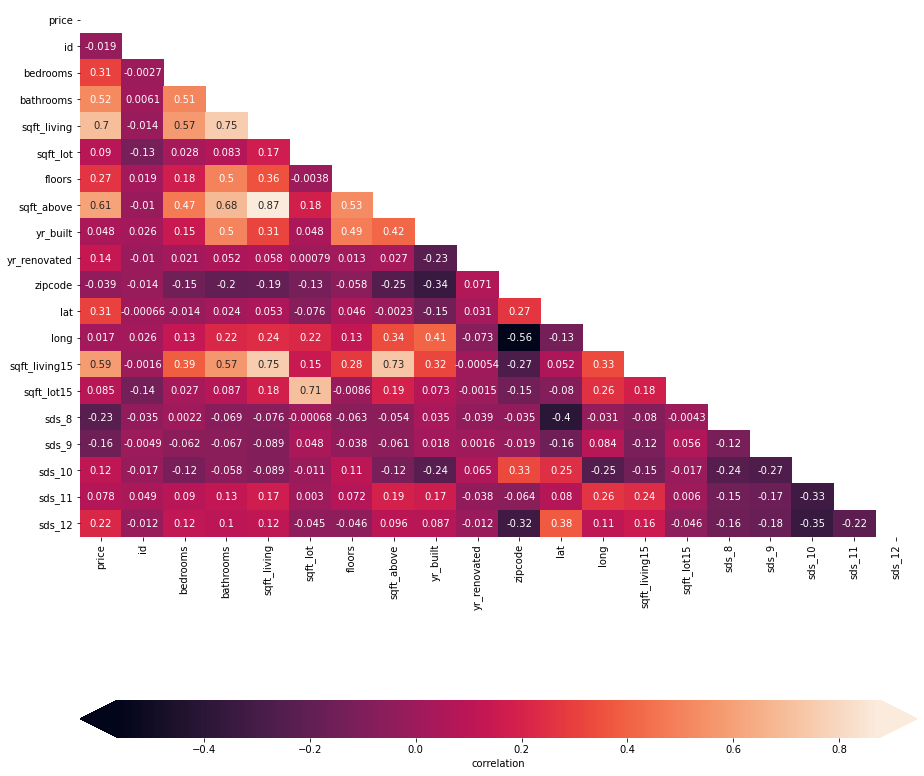

In [25]:
#Re-combine the revised X_train with y_train so we can see the heatmap with 'price':
training_data = pd.concat([y_train, X_train], axis=1)
training_data

heatmap_data = training_data
corr = heatmap_data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, mask=np.triu(corr), ax=ax, annot=True, 
            cbar_kws={'label':'correlation', 'orientation':'horizontal', 'pad':.2, 'extend':'both'});

In [26]:
#Refitting the model now that we have multiple predictors with our dummy variables:
sds_predictors = X_train[['sds_8', 'sds_9','sds_10', 'sds_11', 'sds_12']]
import statsmodels.api as sm
predictors = sm.add_constant(sds_predictors)
predictors.head()

,const,sds_8,sds_9,sds_10,sds_11,sds_12
6405,1.0,0,0,0,0,1
937,1.0,0,0,0,0,1
19076,1.0,0,0,0,0,1
15201,1.0,0,0,1,0,0
13083,1.0,0,0,1,0,0


In [27]:
model = sm.OLS(y_train, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     580.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:08:34   Log-Likelihood:            -2.2879e+05
No. Observations:               16197   AIC:                         4.576e+05
Df Residuals:                   16191   BIC:                         4.576e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.187e+05   9187.772     34.688      0.000    3.01e+05    3.37e+05
sds_8      -2.426e+04   1.23e+04     -1.968      0.049   -4.84e+04    -100.530
sds_9       6.348e+04   1.18e+04      5.374      0.000    4.03e+04    8.66e+04
sds_10      2.771e+05   1.02e+04     27.178      0.000    2.57e+05    2.97e+05
sds_11      2.815e+05   1.12e+04     25.235      0.000     2.6e+05    3.03e+05
sds_12       3.83e+05    1.1e+04     34.908      0.000    3.61e+05    4.04e+05
==============================================================================
Omnibus:                    14975.031   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1178690.495
Skew:                           4.213   Prob(JB):                         0.00
Kurtosis:                      43.933   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
predictors = np.array(predictors).reshape(-1,6)
y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=predictors,
                y=y_train_cv,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.1527755364843322
test score: 0.15015524120036328


We only see a meager increase in the R-squared score even though we're getting more refined coefficients when it comes to each step up between school district scores. 

Also, the standard errors have increased to around ten thousand dollars, but in the big picture of home prices, that isn't too bad. The p-values are all pretty good as well, with the exception of 'sds_8', which is right on the cusp of the standard alpha threshold of 0.05. 

Also, the condition number fell quite a bit, so multicollinearity probably isn't an issue, but I think that's a bit of a truism based on the nature of the predictors in this model. It's also good to see the train & test cross-validation scores are still close.

Looking at my predictors of interest in the school district rankings, while all the correlations are not *particularly* strong, they are almost entirely consistent and they span zero. In other words, the lower-scoring districs negatively correlate with price while the higher-scoring ones incrementally show a rising, positive correlation. 

What's also noteworthy is that nothing is more negatively correlated with price than the two lowest-scoring school districts. Additionally, after all the square footage/room and latitude predictors, the next-highest correlation would be the highest-ranking school districts.

So, what would be a sensible column or two to include in our model while also staying wary of multicollinearity issues? One idea would be 'zipcode' because it also deals with location, like 'school_district_score' does. However, 'zipcode' shows very little in the way of correlation with price. 

**Looking up info on what families look for when buying a house, it seems like a number of factors can come into play. However, multiple articles mention the need for 'room to grow' in a house as well as multiple bedrooms. Let's add those to our model and see whether our results improve.**

First, we'll check their distributions and see whether they're normal:

In [29]:
from scipy.stats import skew
skewness = skew(X_train['bedrooms'])
print("skew of X_train's 'bedrooms':", skewness)

skew of X_train's 'bedrooms': 2.4797971913647334


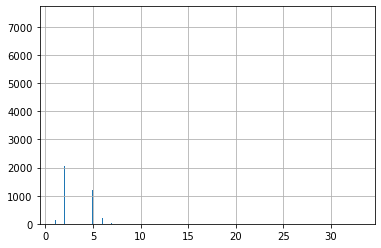

In [30]:
X_train['bedrooms'].hist(bins='auto');

'Bedrooms' seems to be postiviely skewed with its outliers. Maybe it'd be best to logarithmically transform that column:

In [31]:
#Later, I realize this was a mistake, but I'm keeping it here for reference for now:

#X_train['bedrooms_log'] = np.log(X_train['bedrooms'])
#X_train.rename(columns = {'bedrooms': 'bedrooms_log'}, inplace = True)
#X_train['bedrooms_log'].hist(bins='auto');

In [32]:
#skewness = skew(X_train['bedrooms_log'])
#print("skew of X_train's 'bedrooms_log':", skewness)

Wait, I think 'bedrooms' might actually be a categorical variable, not a numerical one. If that's the case, I don't want to logarithmically transform them so much as convert them to dummy variables.

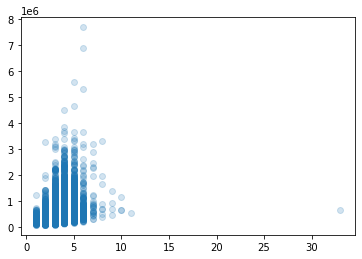

In [33]:
plt.scatter(X_train['bedrooms'], y_train, alpha=0.2);

Yeah, let's try the dummy variable route instead:

In [34]:
X_train['bedrooms'].value_counts()

3     7360
4     5192
2     2054
5     1202
6      195
1      149
7       28
8        8
9        4
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [35]:
bedroom_dummies = pd.get_dummies(X_train['bedrooms'], prefix='bdrm', drop_first=True)
X_train = X_train.drop('bedrooms', axis=1)
X_train = pd.concat([X_train, bedroom_dummies], axis=1)
X_train

,id,date,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,bdrm_3,bdrm_4,bdrm_5,bdrm_6,bdrm_7,bdrm_8,bdrm_9,bdrm_10,bdrm_11,bdrm_33
6405,5454000010,12/10/2014,1.75,2020,9478,1.0,NO,NONE,Good,9 Better,...,1,0,0,0,0,0,0,0,0,0
937,9265880170,8/26/2014,2.50,2470,5954,2.0,NaN,NONE,Average,8 Good,...,0,1,0,0,0,0,0,0,0,0
19076,4151800470,8/20/2014,2.00,1010,5973,1.0,NO,NONE,Very Good,6 Low Average,...,1,0,0,0,0,0,0,0,0,0
15201,9272201704,5/12/2014,2.50,980,895,2.0,NO,NONE,Average,8 Good,...,0,0,0,0,0,0,0,0,0,0
13083,7151700190,3/31/2015,1.50,2210,5000,1.0,NO,AVERAGE,Average,8 Good,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7459810210,10/2/2014,2.25,2050,26000,2.0,NO,NONE,Good,8 Good,...,0,1,0,0,0,0,0,0,0,0
21575,3835502815,9/25/2014,2.50,3110,9930,1.0,NO,FAIR,Average,8 Good,...,1,0,0,0,0,0,0,0,0,0
5390,5693500760,7/7/2014,1.00,1890,3330,1.5,NO,NONE,Good,7 Average,...,1,0,0,0,0,0,0,0,0,0
860,3579000410,9/5/2014,2.25,2010,7447,2.0,NO,NONE,Average,8 Good,...,1,0,0,0,0,0,0,0,0,0


In [36]:
#33 and 11 bedrooms seems like outliers for this dataset, especially since they're unique. 
# They probably just add noise to a model of what almost everyone is looking for, 
# so let's drop those:
X_train = X_train.drop('bdrm_33', axis=1)
X_train = X_train.drop('bdrm_11', axis=1) 
X_train

,id,date,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sds_12,bdrm_2,bdrm_3,bdrm_4,bdrm_5,bdrm_6,bdrm_7,bdrm_8,bdrm_9,bdrm_10
6405,5454000010,12/10/2014,1.75,2020,9478,1.0,NO,NONE,Good,9 Better,...,1,0,1,0,0,0,0,0,0,0
937,9265880170,8/26/2014,2.50,2470,5954,2.0,NaN,NONE,Average,8 Good,...,1,0,0,1,0,0,0,0,0,0
19076,4151800470,8/20/2014,2.00,1010,5973,1.0,NO,NONE,Very Good,6 Low Average,...,1,0,1,0,0,0,0,0,0,0
15201,9272201704,5/12/2014,2.50,980,895,2.0,NO,NONE,Average,8 Good,...,0,1,0,0,0,0,0,0,0,0
13083,7151700190,3/31/2015,1.50,2210,5000,1.0,NO,AVERAGE,Average,8 Good,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7459810210,10/2/2014,2.25,2050,26000,2.0,NO,NONE,Good,8 Good,...,0,0,0,1,0,0,0,0,0,0
21575,3835502815,9/25/2014,2.50,3110,9930,1.0,NO,FAIR,Average,8 Good,...,1,0,1,0,0,0,0,0,0,0
5390,5693500760,7/7/2014,1.00,1890,3330,1.5,NO,NONE,Good,7 Average,...,0,0,1,0,0,0,0,0,0,0
860,3579000410,9/5/2014,2.25,2010,7447,2.0,NO,NONE,Average,8 Good,...,1,0,1,0,0,0,0,0,0,0


Now let's check whether 'sqft_living' shows a normal distribution:

In [37]:
skewness = skew(X_train['sqft_living'])
print("skew of X_train's 'sqft_living':", skewness)

skew of X_train's 'sqft_living': 1.4956470762604674


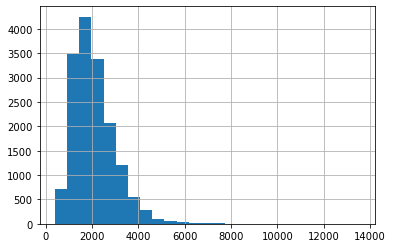

In [38]:
X_train['sqft_living'].hist(bins=25);

It looks like this column's distribution is skewed, so a logarithmic transformation would be helpful:

In [39]:
#Troubleshooting by removing this for now.

#X_train['sqft_living_log'] = np.log(X_train['sqft_living'])
#X_train.rename(columns = {'sqft_living': 'sqft_living_log'}, inplace = True)
#X_train['sqft_living_log'].hist(bins=25);

In [40]:
#skewness = skew(X_train['sqft_living_log'])
#print("skew of X_train's 'sqft_living_log':", skewness)

Now that our predictors are looking more managable and/or normally distributed, let's recombine them to our predictor list:

In [41]:
#predictors = X_train[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
#                      'bdrm_3', 'bdrm_4', 'bdrm_5', 'bdrm_6', 'bdrm_7',\
#                      'bdrm_8', 'bdrm_9', 'bdrm_10', 'sqft_living_log']]
predictors = X_train[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
                      'bdrm_3', 'bdrm_4', 'bdrm_5', 'bdrm_6', 'bdrm_7',\
                      'bdrm_8', 'bdrm_9', 'bdrm_10', 'sqft_living']]
predictors = sm.add_constant(predictors)
predictors.head()

,const,sds_8,sds_9,sds_10,sds_11,sds_12,bdrm_3,bdrm_4,bdrm_5,bdrm_6,bdrm_7,bdrm_8,bdrm_9,bdrm_10,sqft_living
6405,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,2020
937,1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,2470
19076,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,1010
15201,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,980
13083,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,2210


In [42]:
model = sm.OLS(y_train, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1721.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:08:56   Log-Likelihood:            -2.2274e+05
No. Observations:               16197   AIC:                         4.455e+05
Df Residuals:                   16182   BIC:                         4.456e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.409e+05   8399.341    -16.773      0.000   -1.57e+05   -1.24e+05
sds_8       -1.279e+04   8494.237     -1.506      0.132   -2.94e+04    3855.518
sds_9        6.702e+04   8142.935      8.231      0.000    5.11e+04     8.3e+04
sds_10       2.459e+05   7062.104     34.818      0.000    2.32e+05     2.6e+05
sds_11       1.367e+05   7763.587     17.603      0.000    1.21e+05    1.52e+05
sds_12        2.78e+05   7600.623     36.570      0.000    2.63e+05    2.93e+05
bdrm_3      -9.096e+04   5766.595    -15.773      0.000   -1.02e+05   -7.97e+04
bdrm_4      -1.495e+05   6718.766    -22.254      0.000   -1.63e+05   -1.36e+05
bdrm_5      -1.707e+05   9317.305    -18.320      0.000   -1.89e+05   -1.52e+05
bdrm_6      -1.618e+05   1.78e+04     -9.103      0.000   -1.97e+05   -1.27e+05
bdrm_7       -2.81e+05   4.39e+04     -6.406      0.000   -3.67e+05   -1.95e+05
bdrm_8        4.37e+04   8.07e+04      0.541      0.588   -1.15e+05    2.02e+05
bdrm_9      -3.593e+05   1.14e+05     -3.155      0.002   -5.82e+05   -1.36e+05
bdrm_10     -3.591e+05   1.31e+05     -2.733      0.006   -6.17e+05   -1.02e+05
sqft_living   296.7063      2.484    119.433      0.000     291.837     301.576
==============================================================================
Omnibus:                    11942.111   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           609144.244
Skew:                           3.032   Prob(JB):                         0.00
Kurtosis:                      32.425   Cond. No.                     1.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#predictors = np.array(predictors).reshape(-1,15)
y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=predictors,
                y=y_train,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.598010018698134
test score: 0.5972156260387346


In [44]:
#Wow, that condition number is out of control.
np.std(predictors)
#Well, maybe I get the validation stuff done first?

const            0.000000
sds_8            0.299282
sds_9            0.327212
sds_10           0.475127
sds_11           0.373696
sds_12           0.389870
bdrm_3           0.497917
bdrm_4           0.466689
bdrm_5           0.262114
bdrm_6           0.109061
bdrm_7           0.041542
bdrm_8           0.022219
bdrm_9           0.015713
bdrm_10          0.013608
sqft_living    914.887750
dtype: float64

The good news is an improved R-squared score that just barely surpasses the baseline, but it's still not a very impressive R-squared score. What if I also considered the distribution of prices?

In [45]:
skewness = skew(y_train)
print("skew of y_train:", skewness)

skew of y_train: [3.82104252]


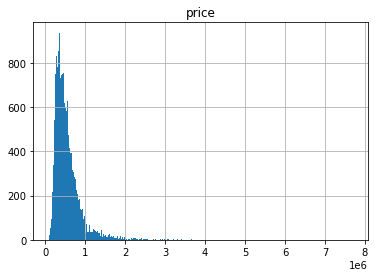

In [46]:
y_train.hist(bins='auto');

It looks like the listing price, aka y_train, is also skewed and a new model could benefit from a logarithmically transformed y_train:

In [47]:
#Troubleshooting by removing this for now. 

#y_train_log = np.log(y_train['price'])
#y_train.rename(columns = {'price': 'price_log'}, inplace = True)
#y_train_log.hist(bins='auto');

In [48]:
#skewness = skew(y_train_log)
#print("skew of y_train_log:", skewness)

In [49]:
#Now let's fit a new model with a logged price:
#model = sm.OLS(y_train_log, predictors).fit()
model = sm.OLS(y_train, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1721.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:09:59   Log-Likelihood:            -2.2274e+05
No. Observations:               16197   AIC:                         4.455e+05
Df Residuals:                   16182   BIC:                         4.456e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.409e+05   8399.341    -16.773      0.000   -1.57e+05   -1.24e+05
sds_8       -1.279e+04   8494.237     -1.506      0.132   -2.94e+04    3855.518
sds_9        6.702e+04   8142.935      8.231      0.000    5.11e+04     8.3e+04
sds_10       2.459e+05   7062.104     34.818      0.000    2.32e+05     2.6e+05
sds_11       1.367e+05   7763.587     17.603      0.000    1.21e+05    1.52e+05
sds_12        2.78e+05   7600.623     36.570      0.000    2.63e+05    2.93e+05
bdrm_3      -9.096e+04   5766.595    -15.773      0.000   -1.02e+05   -7.97e+04
bdrm_4      -1.495e+05   6718.766    -22.254      0.000   -1.63e+05   -1.36e+05
bdrm_5      -1.707e+05   9317.305    -18.320      0.000   -1.89e+05   -1.52e+05
bdrm_6      -1.618e+05   1.78e+04     -9.103      0.000   -1.97e+05   -1.27e+05
bdrm_7       -2.81e+05   4.39e+04     -6.406      0.000   -3.67e+05   -1.95e+05
bdrm_8        4.37e+04   8.07e+04      0.541      0.588   -1.15e+05    2.02e+05
bdrm_9      -3.593e+05   1.14e+05     -3.155      0.002   -5.82e+05   -1.36e+05
bdrm_10     -3.591e+05   1.31e+05     -2.733      0.006   -6.17e+05   -1.02e+05
sqft_living   296.7063      2.484    119.433      0.000     291.837     301.576
==============================================================================
Omnibus:                    11942.111   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           609144.244
Skew:                           3.032   Prob(JB):                         0.00
Kurtosis:                      32.425   Cond. No.                     1.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
#new_predictors = np.array(X_train[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
#                      'bdrm_3', 'bdrm_4', 'bdrm_5', 'bdrm_6', 'bdrm_7',\
#                      'bdrm_8', 'bdrm_9', 'bdrm_10', 'bdrm_11',\
#                      'sqft_living_log']]).reshape(-1,15)

#That's not necessary since predictors didn't change.

#y_train_cv = np.array(y_train_log).reshape(-1,1)
y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=predictors,
                y=y_train_cv,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.598010018698134
test score: 0.5972156260387346


In [51]:
final_model = LinearRegression()
final_model.fit(y_train_cv, predictors)

LinearRegression()

Alright, we have a final model with an improved R-squared score from our baseline with a somewhat reasonable condition number. We can now support our arguement to our stakeholders about common considerations families with school-age children consider when buying a home: school districts given an A-, A, or A+ score, alongside the number of bedrooms and overall square footage, are correlated with higher sale prices. 

However, in order to convey meaningful, real-word results, we'll have to undo our logartihmic transformations to get back to real square foot and USD results. That's something we'll do later, first let's do the same transformations to the testing data:

In [52]:
#Let's see whether X_test contains a bedroom outlier and let's also get a list
# of the total dummy values since they may be different here than in X_train:
X_test['bedrooms'].value_counts()

3    2464
4    1690
2     706
5     399
6      77
1      47
7      10
8       5
9       2
Name: bedrooms, dtype: int64

In [53]:
school_dist_score_dummies_X_test = pd.get_dummies(X_test['school_district_score'], prefix='sds', drop_first=True)
X_test = X_test.drop('school_district_score', axis=1)

bedroom_dummies_X_test = pd.get_dummies(X_test['bedrooms'], prefix='bdrm', drop_first=True)
X_test = X_test.drop('bedrooms', axis=1)

X_test = pd.concat([X_test, school_dist_score_dummies_X_test, bedroom_dummies_X_test], axis=1)
X_test

,id,date,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sds_11,sds_12,bdrm_2,bdrm_3,bdrm_4,bdrm_5,bdrm_6,bdrm_7,bdrm_8,bdrm_9
3686,8024201370,12/8/2014,1.00,880,5111,1.0,NO,NONE,Average,6 Low Average,...,0,0,1,0,0,0,0,0,0,0
10247,6073300040,1/6/2015,2.25,2020,12500,2.0,NO,NONE,Fair,8 Good,...,1,0,0,0,1,0,0,0,0,0
4037,431500155,10/24/2014,1.75,2020,6565,1.0,NO,NONE,Average,8 Good,...,0,0,0,0,0,1,0,0,0,0
3437,7237450110,7/1/2014,2.50,2530,5048,2.0,NO,NONE,Average,8 Good,...,0,0,0,0,1,0,0,0,0,0
19291,3982700250,4/23/2015,2.50,3030,7800,2.0,NO,NONE,Average,9 Better,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,1672000170,9/8/2014,1.75,1890,11141,1.0,NO,NONE,Good,8 Good,...,1,0,0,1,0,0,0,0,0,0
15003,148000680,10/27/2014,1.75,1660,4800,1.0,NO,NONE,Average,7 Average,...,0,0,0,1,0,0,0,0,0,0
13478,7133300380,2/9/2015,2.50,2500,4000,2.0,NO,NONE,Average,8 Good,...,0,0,0,0,1,0,0,0,0,0
18399,9346920260,6/4/2014,2.25,2500,8500,1.0,NaN,NONE,Good,8 Good,...,1,0,0,0,1,0,0,0,0,0


In [54]:
#Don't need this any longer:

#X_test['bedrooms_log'] = np.log(X_test['bedrooms'])
#X_test.rename(columns = {'bedrooms': 'bedrooms_log'}, inplace = True)
#X_test['bedrooms_log'].hist(bins='auto');

In [55]:
#Troubleshooting by removing this for now:

#X_test['sqft_living_log'] = np.log(X_test['sqft_living'])
#X_test.rename(columns = {'sqft_living': 'sqft_living_log'}, inplace = True)
#X_test['sqft_living_log'].hist(bins='auto');

In [56]:
#y_test_log = np.log(y_test['price'])
#y_test.rename(columns = {'price': 'price_log'}, inplace = True)
#y_test_log.hist(bins='auto');

//////////////////// everything above this is fine, everything below this is messed up\\\\\\\\\\\\\\\\\\\\\\\\\

In [57]:
#final_X_test_predictors = np.array(X_test[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
#                      'bdrm_2', 'bdrm_3', 'bdrm_4', 'bdrm_5',\
#                      'bdrm_6', 'bdrm_7', 'bdrm_8', 'bdrm_9',\
#                      'sqft_living_log']]).reshape(-1,14)
#sm.add_constant(final_X_test_predictors)

In [73]:
#final_X_test_predictors = X_test[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
#                      'bdrm_2', 'bdrm_3', 'bdrm_4', 'bdrm_5',\
#                      'bdrm_6', 'bdrm_7', 'bdrm_8', 'bdrm_9',\
#                      'sqft_living_log']]
final_X_test_predictors = X_test[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
                      'bdrm_2', 'bdrm_3', 'bdrm_4', 'bdrm_5',\
                      'bdrm_6', 'bdrm_7', 'bdrm_8', 'bdrm_9',\
                      'sqft_living']]
final_X_test_predictors = sm.add_constant(final_X_test_predictors)
final_X_test_predictors = np.array(final_X_test_predictors).reshape(-1,1)

In [74]:
final_X_test_predictors.shape

(81000, 1)

In [77]:
#y_test = np.array(y_test).reshape(-1,1)
y_test.shape

(5400, 1)

In [61]:
#final_X_test_predictors = final_X_test_predictors
#final_y_test = y_test_log

#This returns the following error: 
# matmul: Input operand 1 has a mismatch in its core dimension 0, 
# with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 15)

#Let's try reshaping them as I found on Google:

In [62]:
#final_X_test_predictors = np.array(final_X_test_predictors).reshape(-1, 15)
#final_X_test_predictors = np.array(final_X_test_predictors).reshape(-1,1)
#final_X_test_predictors = np.array(final_X_test_predictors).reshape(15, -1)
#final_y_test = np.array(y_test_log).reshape(-1,1)

In [78]:
final_model.score(final_X_test_predictors, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [5400, 81000]

In [79]:
y_hat = final_model.predict(final_X_test_predictors)
y_hat

array([[ 1.00000000e+00,  2.01222921e-01,  2.01793641e-01, ...,
        -9.78853476e-05, -3.37743368e-05,  1.11527307e+03],
       [ 1.00000000e+00,  2.01223110e-01,  2.01793790e-01, ...,
        -9.78859883e-05, -3.37747437e-05,  1.11527127e+03],
       [ 1.00000000e+00,  2.01223110e-01,  2.01793790e-01, ...,
        -9.78859883e-05, -3.37747437e-05,  1.11527127e+03],
       ...,
       [ 1.00000000e+00,  2.01223110e-01,  2.01793790e-01, ...,
        -9.78859883e-05, -3.37747437e-05,  1.11527127e+03],
       [ 1.00000000e+00,  2.01223110e-01,  2.01793790e-01, ...,
        -9.78859883e-05, -3.37747437e-05,  1.11527127e+03],
       [ 1.00000000e+00,  2.00716431e-01,  2.01396167e-01, ...,
        -9.61689528e-05, -3.26843392e-05,  1.12007517e+03]])

In [80]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=final_model,
                X=final_X_test_predictors,
#               y=final_y_test,
                y=y_test,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

ValueError: Found input variables with inconsistent numbers of samples: [81000, 5400]

Good news, it looks like our model performs closely between the training and the test data. Let's verify some more information on our model's performance:

In [ ]:
print(predictors.shape)

In [ ]:
print(y_train_cv.shape)

In [ ]:
print(final_X_test_predictors.shape)

In [ ]:
#print(final_y_test.shape)
print(y_test.shape)

In [81]:
y_hat = final_model.predict(final_X_test_predictors)

ValueError: x and y must be the same size

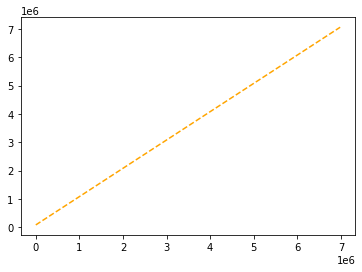

In [82]:
fig, ax = plt.subplots()

#perfect_line = np.arange(final_y_test.min(), final_y_test.max())
perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
#ax.scatter(final_y_test, preds, alpha=0.5)
ax.scatter(y_test, final_X_test_predictors, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [ ]:
preds.shape

In [ ]:
final_y_test.shape

It looks like .predict isn't working right and it's sending out something much longer than y_test.

In [83]:
#training data predictors
lm_train_predictions = final_model.predict(predictors)
#test data predictors
lm_test_predictions = final_model.predict(final_X_test_predictors)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 15)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_train_log, lm_train_predictions, alpha=0.2, label="model")
plt.plot(y_train_log, y_train_log, color='r', label="actual data")
plt.title("model vs. data for training set")
plt.legend();

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_log, lm_test_predictions, color='g', alpha=0.2, label="model")
plt.plot(y_train_log, y_train_log, color='r', label="actual data")
plt.title("model vs. data for test set")
plt.legend();

It's good to also *see* that our model's seem to fit the data. Let's check to make sure we're not violating linearity & normality assumptions. I think this is the point at which we'd un-log our logarithmically transformed testing variables:

In [ ]:
final_X_train_predictors_unlogged = np.array(X_train[['sds_8', 'sds_9','sds_10', 'sds_11', 'sds_12', \
                                   'bedrooms', 'sqft_living']]).reshape(-1,7)
final_X_test_predictors_unlogged = np.array(X_test[['sds_8', 'sds_9','sds_10', 'sds_11', 'sds_12', \
                                   'bedrooms', 'sqft_living']]).reshape(-1,7)
final_y_train_unlogged = np.array(y_train).reshape(-1,1)
final_y_test_unlogged = np.array(y_test).reshape(-1,1)

In [ ]:
final_model_unlogged = sm.OLS(final_y_train_unlogged, final_X_train_predictors_unlogged).fit()
model.summary()

In [ ]:
lm_test_predictions_unlogged = final_model_unlogged.predict(final_X_test_predictors_unlogged)

In [ ]:
fig, ax = plt.subplots()
perfect_line = np.arange(final_y_test_unlogged.min(), final_y_test_unlogged.max())
ax.plot(perfect_line, linestyle='--', color='m', label='perfect fit')
ax.scatter(final_y_test_unlogged, lm_test_predictions_unlogged, color='orange', alpha=0.2)
ax.set_label('actual listing price')
ax.set_ylabel('predicted listing price')
ax.legend();

In [ ]:
lm_test_predictions_unlogged

In [ ]:
#WELP, that doesn't look good. Cool. 

In [ ]:
import scipy.stats as stats
residuals = (final_y_test_unlogged - lm_test_predictions_unlogged)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

\
\
\
\\\If unlogging logs above didn't work, here's what you had done before where we tested for normality using still-logged variables all around.

In [ ]:
lm_test_predictions

In [ ]:
y_test_log = np.array(y_test_log).reshape(-1,1)

In [ ]:
y_test_log.min()

In [ ]:
y_test_log.max()

In [ ]:
fig, ax = plt.subplots()
perfect_line = np.arange(y_test_log.min(), y_test_log.max())
ax.plot(perfect_line, linestyle='--', color='m', label='perfect fit')
ax.scatter(y_test_log, lm_test_predictions, alpha=0.2)
ax.set_label('actual listing price')
ax.set_ylabel('predicted listing price')
ax.legend();

In [ ]:
import scipy.stats as stats
residuals = (y_test_log - lm_test_predictions)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)